In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import patches, gridspec
from matplotlib.colors import LightSource, Normalize, LogNorm
import cmocean

In [55]:
df = pd.read_csv("StancombWillsDataGridded.csv")
xx, yy = np.meshgrid(np.unique(df.x), np.unique(df.y))
velocity_x = df['velx'].values.reshape(xx.shape)
velocity_y = df['vely'].values.reshape(yy.shape)
velocity_magnitude = np.sqrt(velocity_x**2 + velocity_y**2)
bed_radar = df['bed'].values.reshape(xx.shape)
bedmap_bed = df['bedmap_bed'].values.reshape(xx.shape)
surface_elevation = df['surf'].values.reshape(xx.shape)
bedmachine_source = df['bedmachine_source'].values.reshape(xx.shape)
bedmachine_thickness = df['bedmachine_thickness'].values.reshape(xx.shape)
bedmap_surf = df['bedmap_surf'].values.reshape(xx.shape)
bedmap_mask = df['bedmap_mask'].values.reshape(xx.shape)
dhdt = df['dhdt'].values.reshape(xx.shape)
smb = df['smb'].values.reshape(xx.shape)
highvel_mask = df['highvel_mask'].values.reshape(xx.shape)
sgs_bed = np.loadtxt('sgs_bed.txt')
ssc_bed = np.loadtxt('Stancomb_sgs1_bed_10000.txt')
lsc_bed = np.loadtxt('lsc_bed.txt')
bedmachine_bed = bedmap_surf - bedmachine_thickness

In [56]:
gl = gpd.read_file('./moa2014_groundingline_v01/moa2014_grounding_line_v01.shp')
glau = gl.geometry.clip_by_rect(xx.min(), yy.min(), xx.max(), yy.max())
glaux, glauy = glau[0].exterior.xy
glau_ant = gl.geometry.clip_by_rect(-3333250, -3333250, 3333250, 3333250)
glaux_ant,glauy_ant = glau_ant[0].exterior.xy

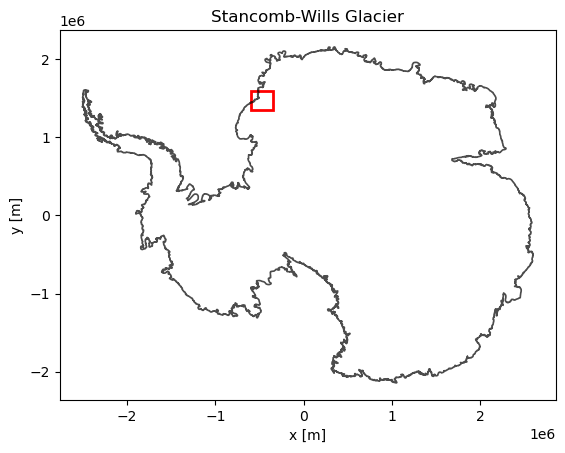

In [57]:
fig, axs =plt.subplots()

pcm1 = axs.plot(np.array(glaux_ant[2:-2]),np.array(glauy_ant[2:-2]),color='black',alpha=0.7,linestyle='-',linewidth=1.2,label='grounding line')
axs.set_title('Stancomb-Wills Glacier')
axs.set_xlabel('x [m]')
axs.set_ylabel('y [m]')
rect = patches.Rectangle((xx.min(), yy.min()), xx.max()-xx.min(), yy.max()-yy.min(), linewidth=2, edgecolor='red', facecolor='none')
axs.add_patch(rect)

(1350000.0, 1600000.0)

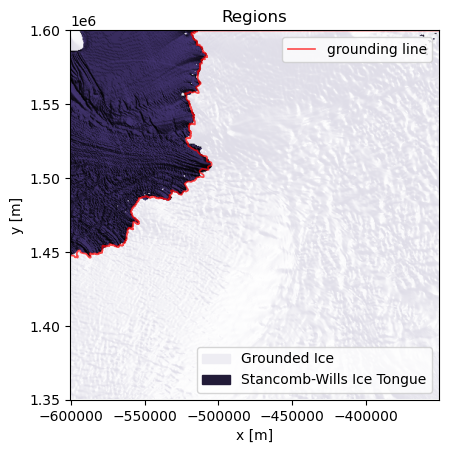

In [58]:
fig, axs =plt.subplots()

ls = LightSource(azdeg=315, altdeg=45)
norm_mask = Normalize(vmin=2, vmax=3)
cmap_mask = cmocean.cm.rain
mask_rgb = ls.shade_rgb(cmap_mask(norm_mask(bedmap_mask)), -surface_elevation, blend_mode='overlay')

pcm2 = axs.imshow(mask_rgb, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower')
axs.plot(np.array(glaux[2:-2]),np.array(glauy[2:-2]),color='red',alpha=0.7,linestyle='-',linewidth=1.2,label='grounding line')
axs.set_title('Regions')
axs.set_xlabel('x [m]')
axs.set_ylabel('y [m]')
ground_patch = patches.Patch(color=cmap_mask(norm_mask(2)), label="Grounded Ice")
floating_patch = patches.Patch(color=cmap_mask(norm_mask(3)), label="Stancomb-Wills Ice Tongue")
og_legend = axs.legend()
axs.legend(handles=[ground_patch, floating_patch], loc="lower right", frameon=True, facecolor="white", framealpha=0.8)
axs.add_artist(og_legend)
axs.set_ylim(1350000, 1600000)

(1350000.0, 1600000.0)

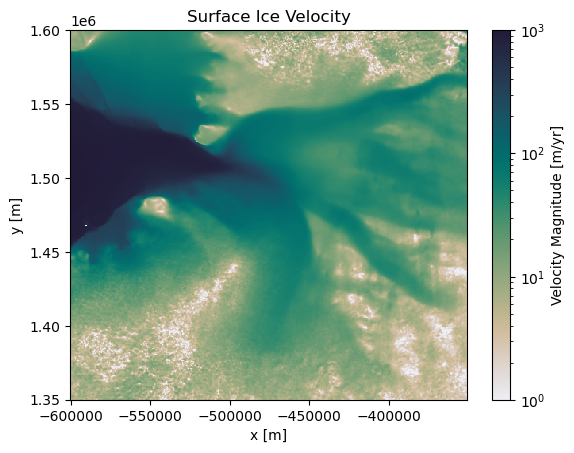

In [59]:
fig, axs = plt.subplots()

pcm3 = axs.pcolormesh(xx, yy, velocity_magnitude, cmap=cmocean.cm.rain, norm=LogNorm(vmin=1, vmax=1000))
axs.set_title('Surface Ice Velocity')
axs.set_xlabel('x [m]')
axs.set_ylabel('y [m]')
fig.colorbar(pcm3, ax=axs, label="Velocity Magnitude [m/yr]")
axs.set_ylim(1350000, 1600000)

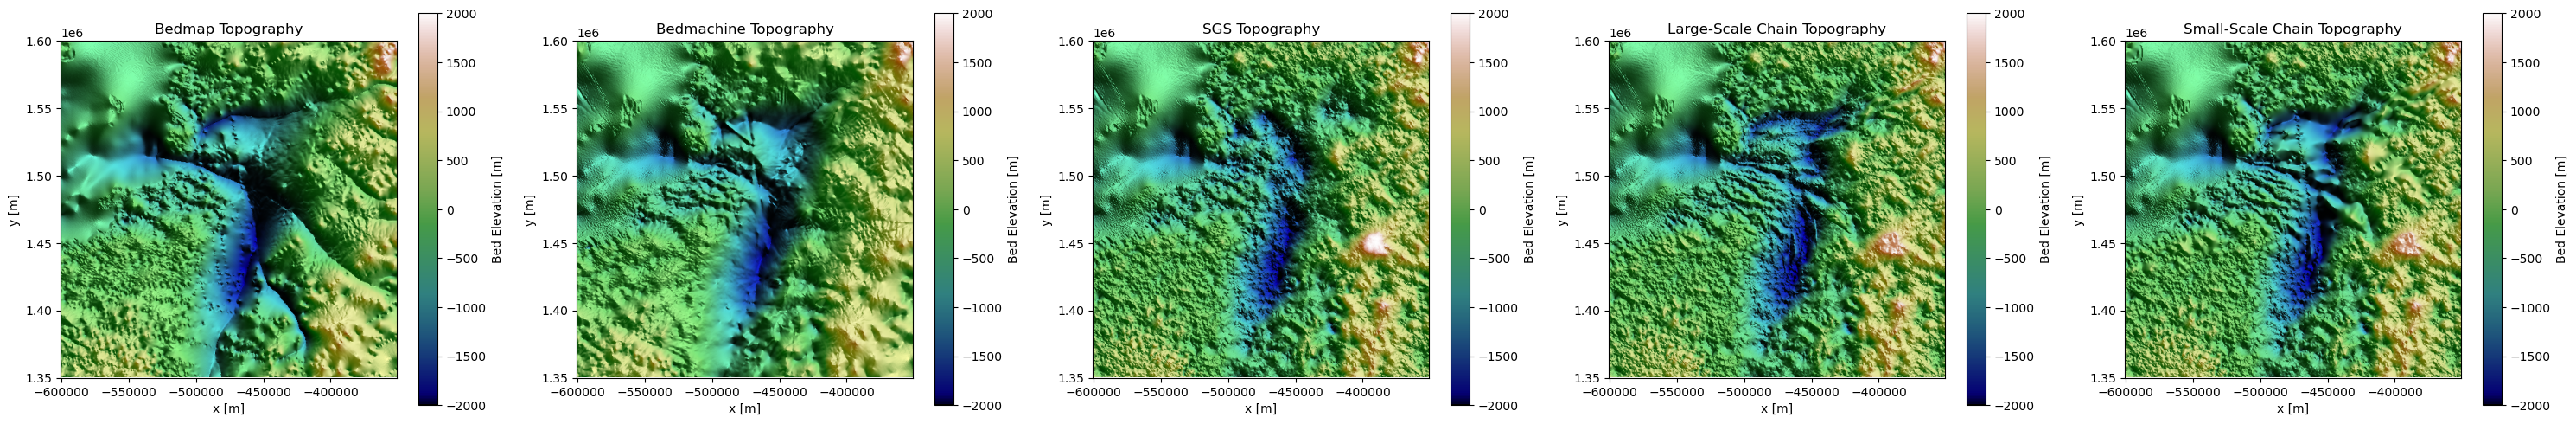

In [60]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(30,5))

ls = LightSource(azdeg=315, altdeg=45)
norm_bed = Normalize(vmin=-2000, vmax=2000)
cmap_bed = plt.cm.gist_earth

bedmap_rgb = ls.shade_rgb(cmap_bed(norm_bed(bedmap_bed)), -bedmap_bed, blend_mode='overlay')
bedmachine_rgb = ls.shade_rgb(cmap_bed(norm_bed(bedmachine_bed)), -bedmachine_bed, blend_mode='overlay')
sgs_rgb = ls.shade_rgb(cmap_bed(norm_bed(sgs_bed)), -sgs_bed, blend_mode='overlay')
ssc_rgb = ls.shade_rgb(cmap_bed(norm_bed(ssc_bed)), -ssc_bed, blend_mode='overlay')
lsc_rgb = ls.shade_rgb(cmap_bed(norm_bed(lsc_bed)), -lsc_bed, blend_mode='overlay')

pcm4 = axs[0].imshow(bedmap_rgb, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower')
axs[0].set_title('Bedmap Topography')
axs[0].set_xlabel('x [m]')
axs[0].set_ylabel('y [m]')
sm4 = plt.cm.ScalarMappable(norm=norm_bed, cmap=cmap_bed)
fig.colorbar(sm4, ax=axs[0], label="Bed Elevation [m]")
axs[0].set_ylim(1350000, 1600000)

pcm5 = axs[1].imshow(bedmachine_rgb, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower')
axs[1].set_title('Bedmachine Topography')
axs[1].set_xlabel('x [m]')
axs[1].set_ylabel('y [m]')
sm5 = plt.cm.ScalarMappable(norm=norm_bed, cmap=cmap_bed)
fig.colorbar(sm5, ax=axs[1], label="Bed Elevation [m]")
axs[1].set_ylim(1350000, 1600000)

pcm6 = axs[2].imshow(sgs_rgb, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower')
axs[2].set_title('SGS Topography')
axs[2].set_xlabel('x [m]')
axs[2].set_ylabel('y [m]')
sm6 = plt.cm.ScalarMappable(norm=norm_bed, cmap=cmap_bed)
fig.colorbar(sm6, ax=axs[2], label="Bed Elevation [m]")
axs[2].set_ylim(1350000, 1600000)

pcm7 = axs[3].imshow(lsc_rgb, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower')
axs[3].set_title('Large-Scale Chain Topography')
axs[3].set_xlabel('x [m]')
axs[3].set_ylabel('y [m]')
sm7 = plt.cm.ScalarMappable(norm=norm_bed, cmap=cmap_bed)
fig.colorbar(sm7, ax=axs[3], label="Bed Elevation [m]")
axs[3].set_ylim(1350000, 1600000)

pcm8 = axs[4].imshow(ssc_rgb, extent=[xx.min(), xx.max(), yy.min(), yy.max()], origin='lower')
axs[4].set_title('Small-Scale Chain Topography')
axs[4].set_xlabel('x [m]')
axs[4].set_ylabel('y [m]')
sm8 = plt.cm.ScalarMappable(norm=norm_bed, cmap=cmap_bed)
fig.colorbar(sm8, ax=axs[4], label="Bed Elevation [m]")
axs[4].set_ylim(1350000, 1600000)

plt.tight_layout()
plt.show()

In [61]:
from Topography import get_mass_conservation_residual

bedmap_residual = get_mass_conservation_residual(bedmap_bed, surface_elevation, velocity_x, velocity_y, dhdt, smb)
bedmachine_residual = get_mass_conservation_residual(bedmachine_bed, surface_elevation, velocity_x, velocity_y, dhdt, smb)
sgs_residual = get_mass_conservation_residual(sgs_bed, surface_elevation, velocity_x, velocity_y, dhdt, smb)
lsc_residual = get_mass_conservation_residual(lsc_bed, surface_elevation, velocity_x, velocity_y, dhdt, smb)
ssc_residual = get_mass_conservation_residual(ssc_bed, surface_elevation, velocity_x, velocity_y, dhdt, smb)

(1350000.0, 1600000.0)

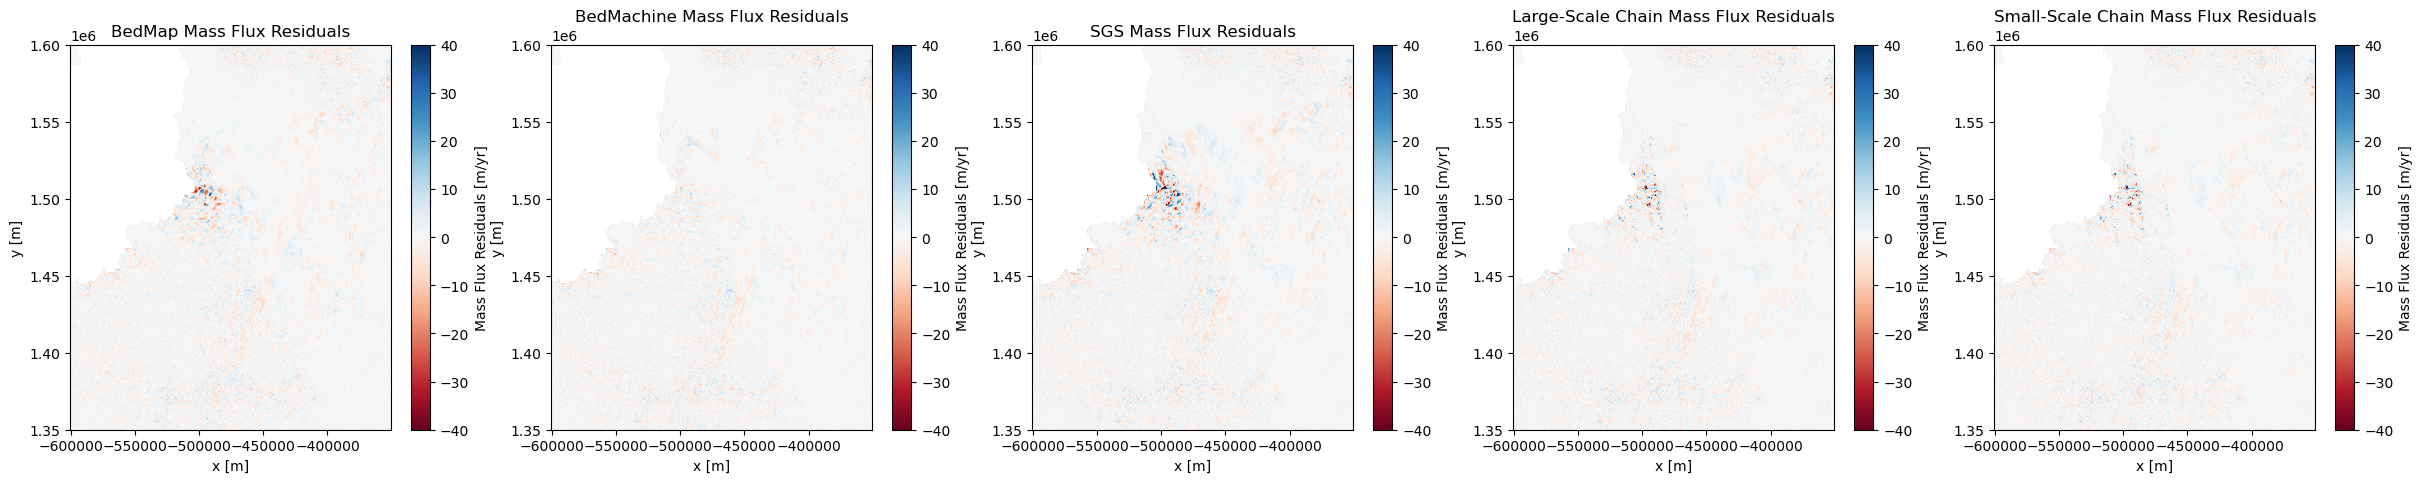

In [62]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(30,5))

pcm9 = axs[0].pcolormesh(xx,yy,bedmap_residual,cmap='RdBu',vmax=40,vmin=-40)
axs[0].set_title('BedMap Mass Flux Residuals')
axs[0].set_xlabel('x [m]')
axs[0].set_ylabel('y [m]')
sm9 = fig.colorbar(pcm9, ax=axs[0], label="Mass Flux Residuals [m/yr]")
axs[0].set_ylim(1350000, 1600000)

pcm10 = axs[1].pcolormesh(xx,yy,bedmachine_residual,cmap='RdBu',vmax=40,vmin=-40)
axs[1].set_title('BedMachine Mass Flux Residuals')
axs[1].set_xlabel('x [m]')
axs[1].set_ylabel('y [m]')
sm11 = fig.colorbar(pcm10, ax=axs[1], label="Mass Flux Residuals [m/yr]")
axs[1].set_ylim(1350000, 1600000)

pcm11 = axs[2].pcolormesh(xx,yy,sgs_residual,cmap='RdBu',vmax=40,vmin=-40)
axs[2].set_title('SGS Mass Flux Residuals')
axs[2].set_xlabel('x [m]')
axs[2].set_ylabel('y [m]')
sm11 = fig.colorbar(pcm10, ax=axs[2], label="Mass Flux Residuals [m/yr]")
axs[2].set_ylim(1350000, 1600000)

pcm12 = axs[3].pcolormesh(xx,yy,lsc_residual,cmap='RdBu',vmax=40,vmin=-40)
axs[3].set_title('Large-Scale Chain Mass Flux Residuals')
axs[3].set_xlabel('x [m]')
axs[3].set_ylabel('y [m]')
sm11 = fig.colorbar(pcm10, ax=axs[3], label="Mass Flux Residuals [m/yr]")
axs[3].set_ylim(1350000, 1600000)

pcm13 = axs[4].pcolormesh(xx,yy,ssc_residual,cmap='RdBu',vmax=40,vmin=-40)
axs[4].set_title('Small-Scale Chain Mass Flux Residuals')
axs[4].set_xlabel('x [m]')
axs[4].set_ylabel('y [m]')
sm11 = fig.colorbar(pcm10, ax=axs[4], label="Mass Flux Residuals [m/yr]")
axs[4].set_ylim(1350000, 1600000)

before running the chain, please set where the block update will be using the object's function set_update_region(update_in_region, region_mask)
then please set up the loss function using either set_loss_type or set_loss_func
an RandField object also need to be created correctly and passed in set_crf_data_weight(RF) and in run(n_iter, RF)
the update blocks is set to be randomly generated for any locations inside the given region


(0.0, 50000.0)

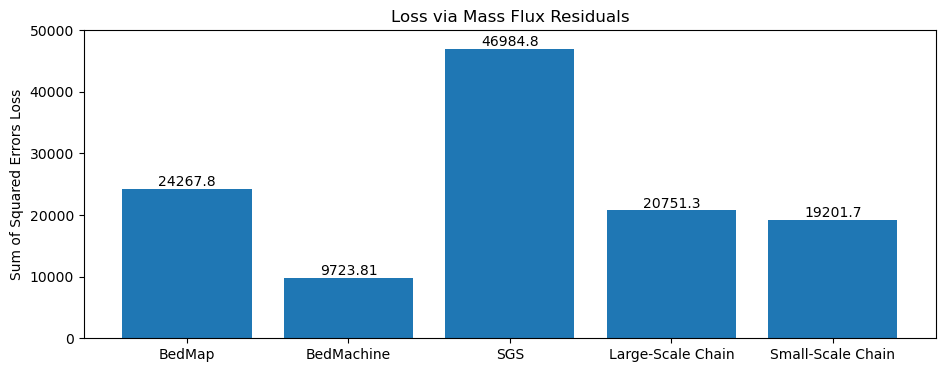

In [63]:
from gstatsMCMC import MCMC

resolution = 500
cond_bed = np.where(bedmap_mask == 1, df['bed'].values.reshape(xx.shape), bedmap_bed)
df['cond_bed'] = cond_bed.flatten()
data_mask = ~np.isnan(cond_bed)
grounded_ice_mask = (bedmap_mask == 1)
largeScaleChain = MCMC.chain_crf(xx, yy, sgs_bed, bedmap_surf, velocity_x, velocity_y, dhdt, smb, cond_bed, data_mask, grounded_ice_mask, resolution)
largeScaleChain.set_update_region(True,highvel_mask)
largeScaleChain.set_loss_type(map_func='sumsquare', sigma_mc=3, massConvInRegion=True)

bedmap_loss = largeScaleChain.loss(bedmap_residual, 0)
bedmachine_loss = largeScaleChain.loss(bedmachine_residual, 0)
sgs_loss = largeScaleChain.loss(sgs_residual, 0)
lsc_loss = largeScaleChain.loss(lsc_residual, 0)
ssc_loss = largeScaleChain.loss(ssc_residual, 0)

categories = ['BedMap', 'BedMachine', 'SGS', 'Large-Scale Chain', 'Small-Scale Chain']
values = [bedmap_loss[0], bedmachine_loss[0], sgs_loss[0], lsc_loss[0], ssc_loss[0]]

fig, axs = plt.subplots(figsize=[11,4])
bars = axs.bar(categories, values)
axs.bar_label(bars)
axs.set_title('Loss via Mass Flux Residuals')
axs.set_ylabel('Sum of Squared Errors Loss')
axs.set_ylim(0, 50000)

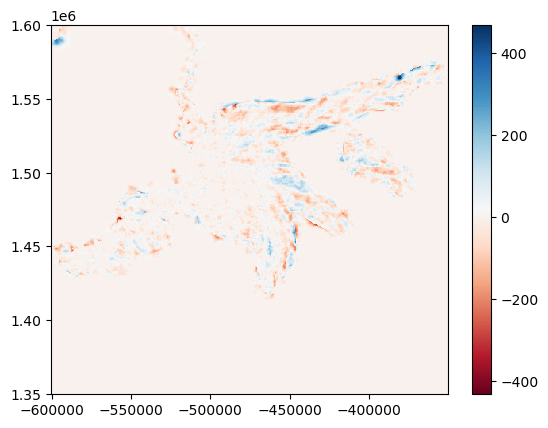

In [66]:
plt.pcolormesh(xx,yy, lsc_bed-ssc_bed,cmap='RdBu')
plt.colorbar()

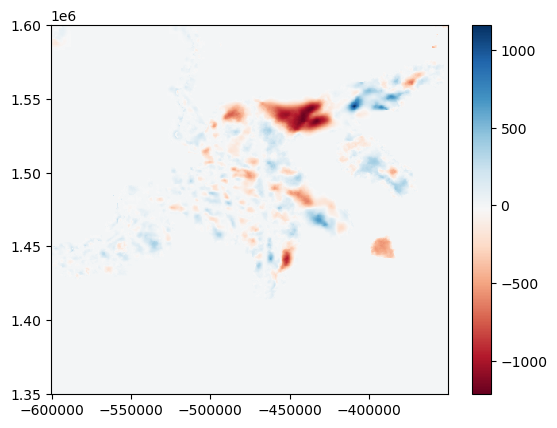

In [67]:
plt.pcolormesh(xx,yy, ssc_bed-sgs_bed,cmap='RdBu')
plt.colorbar()